# COVID-19 Vaccine Analysis

## by Justin Sierchio

In this analysis, we will be looking at COVID-19 vaccination data. We hope to answer some of the following questions:

<ul>
    <li>Which countries are ramping up their vaccine efforts the fastest?</li>
    <li>Where are vaccines lagging behind?</li>
    <li>Are there any other observations we can make from this dataset.</li>

This data is in .csv file format and is from Kaggle at: https://www.kaggle.com/gpreda/covid-world-vaccination-progress/download. More information related to the dataset can be found at: https://www.kaggle.com/gpreda/covid-world-vaccination-progress.

## Notebook Initialization

In [1]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

print('Initial libraries loaded into workspace!')

Initial libraries loaded into workspace!


In [2]:
# Upload Datasets for Study
df_COVID19 = pd.read_csv("country_vaccinations.csv");

print('Datasets uploaded!');

Datasets uploaded!


In [3]:
# Display 1st 5 rows from COVID-19 Vaccine dataset
df_COVID19.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Algeria,DZA,2021-01-29,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
1,Algeria,DZA,2021-01-30,30.0,NaN,NaN,30.0,30.0,0.00,NaN,NaN,1.0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
2,Argentina,ARG,2020-12-29,700.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
3,Argentina,ARG,2020-12-30,NaN,NaN,NaN,NaN,15656.0,NaN,NaN,NaN,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
4,Argentina,ARG,2020-12-31,32013.0,NaN,NaN,NaN,15656.0,0.07,NaN,NaN,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...


Before beginning our data cleaning, let's explain what each of the columns represents:

<ul>
    <li>country - the country for which vaccination information is provided</li>
    <li>iso_code - the ISO code the country</li>
    <li>date - the date for the last entry</li>
    <li>total_vaccinations - the absolute number of total immunizations in the country</li>
    <li>people_vaccinated - the number of people vaccinated</li>
    <li>People_fully_vaccinated - the number of people who have received the entire set of immunizations required by the specific scheme (in most cases 2)</li>
    <li>daily_vaccinations_raw - the number of vaccinations for that date and country</li>
    <li>total_vaccinations_per_hundred - ratio (%) between population immunized and total population of the country</li>
    <li>people_vaccinations_per_hundred - ratio (%) between people vaccination and total population of the country</li>
    <li>people_fully_vaccinated_per_hundred - ratio (%) between people fully vaccinated and total country population</li>
    <li>daily_vaccinations_per_million - ratio (ppm) between vaccination number and total population for current date in the country</li>
    <li>vaccines - vaccines available in the country</li>
    <li>source_name - source of the information (national authority, international organization, local organization etc.)</li>
    <li>source_website - website of the source of information</li>
</ul>

## Data Cleaning

Let's first get a sense of what the dataset looks like.

In [4]:
df_COVID19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934 entries, 0 to 1933
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              1934 non-null   object 
 1   iso_code                             1732 non-null   object 
 2   date                                 1934 non-null   object 
 3   total_vaccinations                   1278 non-null   float64
 4   people_vaccinated                    1004 non-null   float64
 5   people_fully_vaccinated              521 non-null    float64
 6   daily_vaccinations_raw               1045 non-null   float64
 7   daily_vaccinations                   1863 non-null   float64
 8   total_vaccinations_per_hundred       1278 non-null   float64
 9   people_vaccinated_per_hundred        1004 non-null   float64
 10  people_fully_vaccinated_per_hundred  521 non-null    float64
 11  daily_vaccinations_per_million

Let's look at the number of 'Nan' and 'null' values.

In [5]:
df_COVID19.isna().sum()

country                                   0
iso_code                                202
date                                      0
total_vaccinations                      656
people_vaccinated                       930
people_fully_vaccinated                1413
daily_vaccinations_raw                  889
daily_vaccinations                       71
total_vaccinations_per_hundred          656
people_vaccinated_per_hundred           930
people_fully_vaccinated_per_hundred    1413
daily_vaccinations_per_million           71
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

Let's convert all the 'NaN' and 'null' values to 0 to make the analysis easier.

In [6]:
# Fill all 'Nan' and 'null' values with 0
df_COVID19['iso_code'].fillna(0, inplace = True)
df_COVID19['total_vaccinations'].fillna(0, inplace = True)
df_COVID19['people_vaccinated'].fillna(0, inplace = True)
df_COVID19['people_fully_vaccinated'].fillna(0, inplace = True)
df_COVID19['daily_vaccinations_raw'].fillna(0, inplace = True)
df_COVID19['daily_vaccinations'].fillna(0, inplace = True)
df_COVID19['total_vaccinations_per_hundred'].fillna(0, inplace = True)
df_COVID19['people_vaccinated_per_hundred'].fillna(0, inplace = True)
df_COVID19['people_fully_vaccinated_per_hundred'].fillna(0, inplace = True)
df_COVID19['daily_vaccinations_per_million'].fillna(0, inplace = True)

# Check the data values
df_COVID19.isna().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

At this juncture, let's select the columns we believe we will need going forward.

In [7]:
# Feature Selection for States' Dataset
df_COVID19 = df_COVID19[['country', 'date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
                        'daily_vaccinations_raw', 'daily_vaccinations', 'total_vaccinations_per_hundred', 
                        'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 
                        'daily_vaccinations_per_million', 'vaccines']]

Let's organize the data so that the latest information is shown first.

In [8]:
# Reorder columns so that date is the first column
df_COVID19 = df_COVID19.reindex(columns=['date', 'country', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
                        'daily_vaccinations_raw', 'daily_vaccinations', 'total_vaccinations_per_hundred', 
                        'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 
                        'daily_vaccinations_per_million', 'vaccines'])

# Resort data by date
df_COVID19['date'] = pd.to_datetime(df_COVID19['date'])
df_COVID19.sort_values(by=['date'], inplace=True, ascending=False)
df_COVID19.reset_index();

# Display result
df_COVID19.head(10)

,date,country,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
557,2021-02-01,Estonia,38594.0,28186.0,10408.0,539.0,1781.0,2.91,2.12,0.78,1343.0,Pfizer/BioNTech
590,2021-02-01,Finland,163760.0,145557.0,18203.0,0.0,7587.0,2.96,2.63,0.33,1369.0,Pfizer/BioNTech
1384,2021-02-01,Portugal,338566.0,0.0,0.0,1795.0,12189.0,3.32,0.00,0.00,1195.0,Pfizer/BioNTech
1476,2021-02-01,Saudi Arabia,440618.0,0.0,0.0,0.0,11573.0,1.27,0.00,0.00,332.0,Pfizer/BioNTech
862,2021-02-01,Isle of Man,8091.0,6752.0,1230.0,451.0,555.0,9.52,7.94,1.45,6527.0,Pfizer/BioNTech
1769,2021-02-01,Turkey,2136299.0,0.0,0.0,150062.0,119078.0,2.53,0.00,0.00,1412.0,Sinovac
943,2021-02-01,Italy,1991701.0,1343061.0,648640.0,24877.0,71363.0,3.29,2.22,1.07,1180.0,Pfizer/BioNTech
224,2021-02-01,Canada,955198.0,0.0,0.0,0.0,21835.0,2.53,0.00,0.00,579.0,"Moderna, Pfizer/BioNTech"
1797,2021-02-01,United Arab Emirates,3440777.0,3190777.0,250000.0,106615.0,124241.0,34.79,32.26,2.53,12562.0,"Pfizer/BioNTech, Sinopharm"
1307,2021-02-01,Palau,3109.0,0.0,0.0,0.0,104.0,17.18,0.00,0.00,5748.0,Moderna


Now let's create a separate variable to keep the latest set of vaccine data by date for future analysis.

In [9]:
# Look at the latest set of death totals for each state and territory
df_COVID19_latest = df_COVID19.drop_duplicates(subset=['country'], keep='first')
df_COVID19_latest;

# Sort the cumulative death data by largest to smallest
df_COVID19_latest.sort_values(by=['country'])

,date,country,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
1,2021-01-30,Algeria,30.0,0.0,0.0,30.0,30.0,0.00,0.00,0.00,1.0,Sputnik V
36,2021-02-01,Argentina,375851.0,281577.0,94274.0,0.0,11924.0,0.83,0.62,0.21,264.0,Sputnik V
59,2021-02-01,Austria,202345.0,186479.0,15866.0,1847.0,8714.0,2.25,2.07,0.18,968.0,Pfizer/BioNTech
99,2021-01-31,Bahrain,171568.0,171568.0,0.0,1135.0,1841.0,10.08,10.08,0.00,1082.0,"Pfizer/BioNTech, Sinopharm"
134,2021-01-31,Belgium,296961.0,279195.0,17766.0,368.0,9268.0,2.56,2.41,0.15,800.0,"Moderna, Pfizer/BioNTech"
...,...,...,...,...,...,...,...,...,...,...,...,...
1769,2021-02-01,Turkey,2136299.0,0.0,0.0,150062.0,119078.0,2.53,0.00,0.00,1412.0,Sinovac
1797,2021-02-01,United Arab Emirates,3440777.0,3190777.0,250000.0,106615.0,124241.0,34.79,32.26,2.53,12562.0,"Pfizer/BioNTech, Sinopharm"
1840,2021-01-31,United Kingdom,9790576.0,9296367.0,494209.0,322194.0,392361.0,14.42,13.69,0.73,5780.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
1883,2021-01-31,United States,31123299.0,25201143.0,5657142.0,1545397.0,1324949.0,9.40,7.61,1.71,4003.0,"Moderna, Pfizer/BioNTech"


## Exploratory Data Analysis

Let's begin our exploratory analysis by looking at the top 20 countries (relative to population) for vaccinating their populations (as of the latest date in our dataset).

In [10]:
# Find the top 20 countries for vaccinating their populations (as of the latest date in our dataset)
df_COVID19_latest1 = df_COVID19_latest[['country', 'people_vaccinated_per_hundred']];
df_COVID19_latest1_sort = df_COVID19_latest1.sort_values(by=['people_vaccinated_per_hundred'], ascending=False)
print('Top 20 Countries by Total Vaccinations (per 100 population)\n')
print(df_COVID19_latest1_sort.head(20))

Top 20 Countries by Total Vaccinations (per 100 population)

                   country  people_vaccinated_per_hundred
683              Gibraltar                          38.25
906                 Israel                          35.60
1797  United Arab Emirates                          32.26
521                England                          14.36
1840        United Kingdom                          13.69
1933                 Wales                          13.20
1209      Northern Ireland                          11.71
1526              Scotland                          10.54
99                 Bahrain                          10.08
862            Isle of Man                           7.94
1883         United States                           7.61
1080                 Malta                           5.39
470                Denmark                           3.25
781                Iceland                           3.14
850                Ireland                           3.05
1419       

As we can see from this dataset, most of the countries are in Europe, with the English-speaking countries toward the top. 

Let's see how many countries have actually begun vaccination programs for which we have data. (as defined by people vaccinated per 100 population).

In [11]:
# Find the number of countries with nonzero people vaccinated per 100 population
df_COVID19_latest1.astype(bool).sum(axis=0)

country                          67
people_vaccinated_per_hundred    44
dtype: int64

So from our result, we see that of the countries with active vaccination programs for which we have data, roughly 2/3rds have nonzero populations with vaccinations.

Now let's look at the rate of full vaccinations (i.e. by people fully vaccinated per 100).

In [12]:
# Find the top 20 countries for vaccinating their populations (as of the latest date in our dataset)
df_COVID19_latest2 = df_COVID19_latest[['country', 'people_fully_vaccinated_per_hundred']];
df_COVID19_latest2_sort = df_COVID19_latest2.sort_values(by=['people_fully_vaccinated_per_hundred'], ascending=False)
print('Top 20 Countries by People Fully Vaccinated (per 100 population)\n')
print(df_COVID19_latest2_sort.head(20))

Top 20 Countries by People Fully Vaccinated (per 100 population)

                   country  people_fully_vaccinated_per_hundred
906                 Israel                                20.68
1797  United Arab Emirates                                 2.53
1883         United States                                 1.71
862            Isle of Man                                 1.45
470                Denmark                                 1.42
781                Iceland                                 1.41
1209      Northern Ireland                                 1.30
683              Gibraltar                                 1.19
1648              Slovenia                                 1.12
943                  Italy                                 1.07
850                Ireland                                 1.00
1080                 Malta                                 0.89
521                England                                 0.82
1015             Lithuania            

Interestingly enough, the United States is 3rd in the world in people fully vaccinated per 100 population.

Finally, to get a sense of the overall vaccine ramp-up operations, let us look at daily vaccinations per 1 million people.

In [13]:
# Find the top 20 countries for vaccinating their populations (as of the latest date in our dataset)
df_COVID19_latest3 = df_COVID19_latest[['country', 'daily_vaccinations_per_million']];
df_COVID19_latest3_sort = df_COVID19_latest3.sort_values(by=['daily_vaccinations_per_million'], ascending=False)
print('Top 20 Countries by Total Vaccinations (per 100 population)\n')
print(df_COVID19_latest3_sort.head(20))

Top 20 Countries by Total Vaccinations (per 100 population)

                   country  daily_vaccinations_per_million
1570            Seychelles                         20297.0
906                 Israel                         18745.0
1797  United Arab Emirates                         12562.0
683              Gibraltar                         12496.0
1933                 Wales                          6605.0
862            Isle of Man                          6527.0
521                England                          6025.0
1840        United Kingdom                          5780.0
1549                Serbia                          5753.0
1307                 Palau                          5748.0
1209      Northern Ireland                          4833.0
1526              Scotland                          4257.0
1883         United States                          4003.0
781                Iceland                          3900.0
1159       Northern Cyprus                          37

Not surprisingly, many of the same countries that have the highest population-weighted vaccination rates also have the highest daily number of vaccinations per million people.

Let's take a little closer in-depth look at Israel and the United Arab Emirates, both of whom have extensive numbers of people vaccinated related to their population.

In [14]:
# Set up dataset for Israel, UAE
df_COVID19_Israel = df_COVID19.loc[df_COVID19['country'] == 'Israel']
df_COVID19_UAE = df_COVID19.loc[df_COVID19['country'] == 'United Arab Emirates']

Let's plot the people vaccinated per 100 in both Israel and UAE.

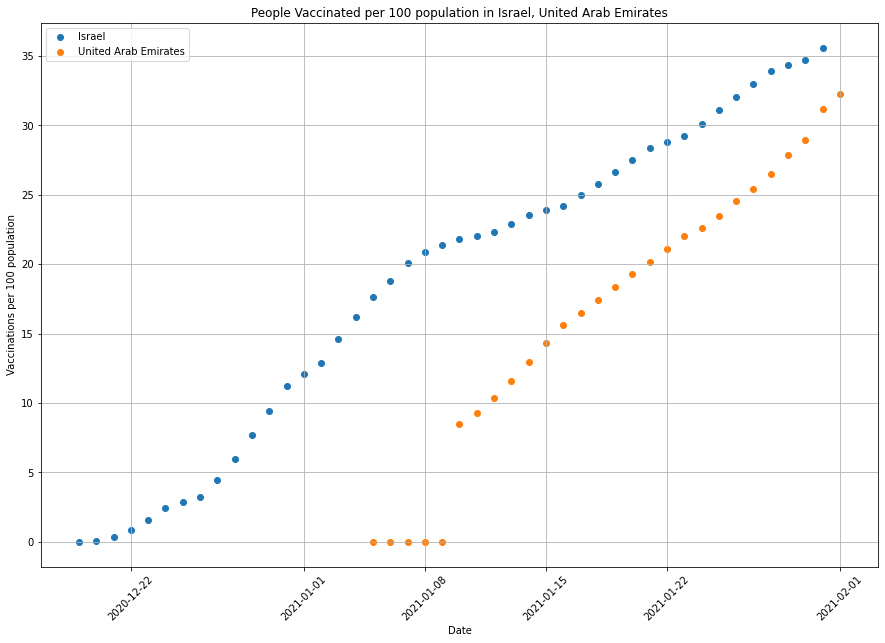

In [15]:
# Import the needed libraries
import matplotlib.dates as mdates

# Create the axes
x1 = df_COVID19_Israel['date']
x2 = df_COVID19_UAE['date']
y1 = df_COVID19_Israel['people_vaccinated_per_hundred']
y2 = df_COVID19_UAE['people_vaccinated_per_hundred']

# Create the plot and format the dates
fig, ax2 = plt.subplots(figsize=(15,10))
plt.scatter(x1,y1)
plt.scatter(x2,y2)
monthyearFmt = mdates.DateFormatter('%Y %B')
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax2.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m-%d"))
_ = plt.xticks(rotation=45)

# Display the plot
plt.grid()
plt.xlabel('Date')
plt.ylabel('Vaccinations per 100 population')
plt.title('People Vaccinated per 100 population in Israel, United Arab Emirates')
plt.legend(["Israel", "United Arab Emirates"], loc ="upper left") 
plt.show()

From this information, we can see that Israel quickly started ramping up vaccinations in late December 2020, whereas the UAE has started a couple of weeks later. Based upon this graph, it appears that by March 2020, the UAE will have a greater percentage of people having been vaccinated. We can revisit that prediction to see if it is true in a later time.

A little closer to home, let us look at the situation in the United States.

In [16]:
# Set up dataset for United States vaccination data
df_COVID19_USA = df_COVID19.loc[df_COVID19['country'] == 'United States']
df_COVID19_USA.head(5)

,date,country,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
1883,2021-01-31,United States,31123299.0,25201143.0,5657142.0,1545397.0,1324949.0,9.40,7.61,1.71,4003.0,"Moderna, Pfizer/BioNTech"
1882,2021-01-30,United States,29577902.0,24064165.0,5259693.0,1693241.0,1291416.0,8.94,7.27,1.59,3902.0,"Moderna, Pfizer/BioNTech"
1881,2021-01-29,United States,27884661.0,22858318.0,4780888.0,1690979.0,1253815.0,8.42,6.91,1.44,3788.0,"Moderna, Pfizer/BioNTech"
1880,2021-01-28,United States,26193682.0,21698606.0,4263056.0,1541048.0,1235330.0,7.91,6.56,1.29,3732.0,"Moderna, Pfizer/BioNTech"
1879,2021-01-27,United States,24652634.0,20687970.0,3801053.0,1111640.0,1161050.0,7.45,6.25,1.15,3508.0,"Moderna, Pfizer/BioNTech"


It appears there has been an exponential increase in the numbers of people fully vaccinated in the United States since vaccination data began being collected in December 2020.

At this point, let's compare the number of people vaccinated vs the number of people fully vaccinated in the United States. In other words, let's look at how many people have only received 1 dose of a vaccine thusfar.

In [17]:
# Create a variable for people having only received partial vaccinations
df_COVID19_USA2 = df_COVID19_USA.copy()
df_COVID19_USA2['people_partially_vaccinated_per_hundred'] = df_COVID19_USA['people_vaccinated_per_hundred'] - df_COVID19_USA['people_fully_vaccinated_per_hundred']
df_COVID19_USA2.head(5)

,date,country,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,people_partially_vaccinated_per_hundred
1883,2021-01-31,United States,31123299.0,25201143.0,5657142.0,1545397.0,1324949.0,9.40,7.61,1.71,4003.0,"Moderna, Pfizer/BioNTech",5.90
1882,2021-01-30,United States,29577902.0,24064165.0,5259693.0,1693241.0,1291416.0,8.94,7.27,1.59,3902.0,"Moderna, Pfizer/BioNTech",5.68
1881,2021-01-29,United States,27884661.0,22858318.0,4780888.0,1690979.0,1253815.0,8.42,6.91,1.44,3788.0,"Moderna, Pfizer/BioNTech",5.47
1880,2021-01-28,United States,26193682.0,21698606.0,4263056.0,1541048.0,1235330.0,7.91,6.56,1.29,3732.0,"Moderna, Pfizer/BioNTech",5.27
1879,2021-01-27,United States,24652634.0,20687970.0,3801053.0,1111640.0,1161050.0,7.45,6.25,1.15,3508.0,"Moderna, Pfizer/BioNTech",5.10


Now let's plot the number of people partially vaccinated and people fully vaccinated on the same plot.

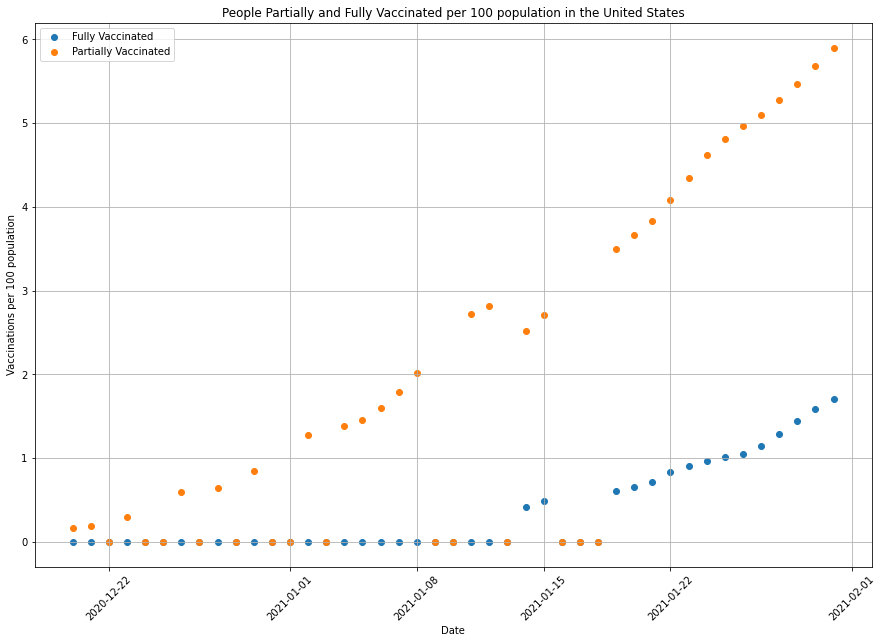

In [18]:
# Create the axes
x = df_COVID19_USA2['date']
y1 = df_COVID19_USA2['people_fully_vaccinated_per_hundred']
y2 = df_COVID19_USA2['people_partially_vaccinated_per_hundred']

# Create the plot and format the dates
fig, ax2 = plt.subplots(figsize=(15,10))
plt.scatter(x,y1)
plt.scatter(x,y2)
monthyearFmt = mdates.DateFormatter('%Y %B')
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax2.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m-%d"))
_ = plt.xticks(rotation=45)

# Display the plot
plt.grid()
plt.xlabel('Date')
plt.ylabel('Vaccinations per 100 population')
plt.title('People Partially and Fully Vaccinated per 100 population in the United States')
plt.legend(["Fully Vaccinated", "Partially Vaccinated"], loc ="upper left") 
plt.show()

From this plot, we can see roughly a 25 day gap between the numbers of fully vaccinated people and partially vaccinated people, indicating the staging of the vaccine doses.

## Results and Discussion

In this open-ended project, we were able to arrive a few interesting results:

<ul>
    <li>(1) Israel and the UAE lead the world in people vaccinated/100 population.</li>
    <li>(2) The difference in the US between people vaccinated and fully vaccinated is about 25 days.</li>
    <li>(3) The majority of countries with vaccine programs ramping up are in Europe.</li>
</ul>

## Conclusion

The goal of this project was to explore trends in COVID-19 vaccination data and we were able to answer some basic questions. 

In this project, we were able to upload a real-world dataset, clean the data systematically, perform several different exploratory data analysis, make useful data visualizations, and draw logical inferences from those analyses. It is the author's hope that others find this exericse useful. Thanks for reading!